In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import FashionMNIST
import torch
from torch.utils.data import DataLoader

In [4]:
'''The output of the torchvision datasets are PILImage images of range [0,1]
    Transform them into the form of Tensors using transforms function'''
transform = transforms.ToTensor()

dataset = FashionMNIST(root = './F_MNIST', transform=transform, download=True)

0it [00:00, ?it/s]

26427392it [00:04, 6599200.63it/s]                               


Extracting ./F_MNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 61190.15it/s]                            
0it [00:00, ?it/s]

Extracting ./F_MNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 2479795.47it/s]                             
0it [00:00, ?it/s]

Extracting ./F_MNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 21632.29it/s]            

Extracting ./F_MNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [7]:
# We will take a batch of images from the dataset
batch_size = 20

train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle= True)

In [8]:
#define the classes of the dataset
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Visualizing the training data

In [9]:
import numpy as np

dataiter = iter(train_loader)
images, labels = dataiter.next()

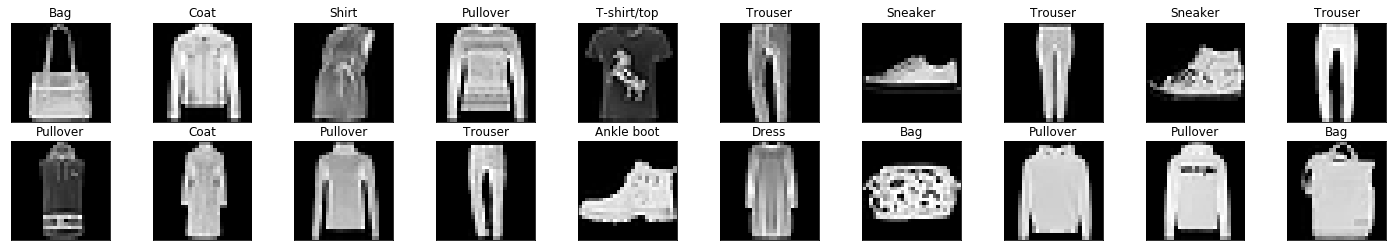

In [10]:
# Converting tensors to numpy array to visualize the images
images = images.numpy()

#Ploting the images in the batch, along with the labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(classes[labels[idx]])

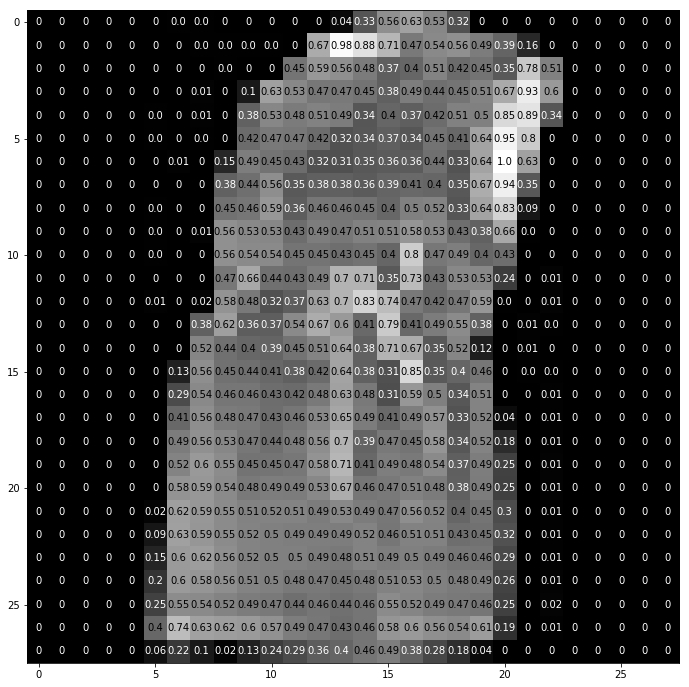

In [11]:
# select an image by index
idx = 2
img = np.squeeze(images[idx])

# display the pixel values in that image
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')